In [2]:
conda install pandas

SyntaxError: invalid syntax (<ipython-input-2-182416202f0a>, line 1)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Data loading from csv
df = pd.read_csv('test.csv')
df.shape


(1953, 2)

In [3]:
df

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


In [4]:
df.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
h="kello"

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['score2'] = df['tweet'].apply(lambda review: sid.polarity_scores(review))

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raora\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,tweet,score2
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou..."
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp..."
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp..."
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp..."
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com..."


In [7]:
df['compound']  = df['score2'].apply(lambda score_dict: score_dict['compound'])

df.head()

,id,tweet,score2,compound
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",-0.4215
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7243
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.7650
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com...",-0.3595


In [8]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,id,tweet,score2,compound,comp_score
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351,neg
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",-0.4215,neg
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7243,pos
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.7650,neg
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com...",-0.3595,neg


In [9]:
df = df.sort_values(by ='compound' )
print("Contents of Sorted Dataframe based on a single column 'compound' : ")
df

Contents of Sorted Dataframe based on a single column 'compound' : 


,id,tweet,score2,compound,comp_score
1556,9477,Fuck iPhones. Fuck them fuck them fuck them fu...,"{'neg': 0.758, 'neu': 0.242, 'pos': 0.0, 'comp...",-0.9715,neg
1598,9519,Fuck you #apple. Fuck you for being a shitty #...,"{'neg': 0.435, 'neu': 0.513, 'pos': 0.051, 'co...",-0.9623,neg
366,8287,(YouTube) The Murder of Antoinette Chase – Mur...,"{'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'comp...",-0.9403,neg
486,8407,Dear #iphone5 FUCK YOU!! YOURE MAKING MY 4 CRA...,"{'neg': 0.411, 'neu': 0.511, 'pos': 0.078, 'co...",-0.9197,neg
28,7949,My iPhone 5 charger has broken. I bought two n...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.9186,neg
...,...,...,...,...,...
595,8516,"I'm minorly inconvenienced, but they're taking...","{'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...",0.9428,pos
1745,9666,Was at the apple store today - what an experie...,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.9474,pos
458,8379,Wow what a great day. #iphonex arrived and it’...,"{'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'comp...",0.9477,pos
759,8680,#May the divine blessings of Allah bring you h...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.9508,pos


In [10]:
df.describe()

,id,compound
count,1953.000000,1953.000000
mean,8897.000000,0.143253
std,563.926857,0.423419
min,7921.000000,-0.971500
25%,8409.000000,0.000000
50%,8897.000000,0.000000
75%,9385.000000,0.493900
max,9873.000000,0.952600


In [11]:
df.groupby('comp_score').describe()

id                                                             \
             count         mean         std     min      25%     50%      75%   
comp_score                                                                      
neg          364.0  8881.527473  574.742493  7921.0  8365.25  8841.5  9360.75   
pos         1589.0  8900.544368  561.543531  7923.0  8417.00  8905.0  9387.00   

                   compound                                              \
               max    count      mean       std     min     25%     50%   
comp_score                                                                
neg         9861.0    364.0 -0.475907  0.225276 -0.9715 -0.6486 -0.4767   
pos         9873.0   1589.0  0.285087  0.317452  0.0000  0.0000  0.0754   

                            
               75%     max  
comp_score                  
neg        -0.2960 -0.0258  
pos         0.5859  0.9526

In [12]:
df['length'] = df['tweet'].apply(len)
df.head()

,id,tweet,score2,compound,comp_score,length
1556,9477,Fuck iPhones. Fuck them fuck them fuck them fu...,"{'neg': 0.758, 'neu': 0.242, 'pos': 0.0, 'comp...",-0.9715,neg,73
1598,9519,Fuck you #apple. Fuck you for being a shitty #...,"{'neg': 0.435, 'neu': 0.513, 'pos': 0.051, 'co...",-0.9623,neg,228
366,8287,(YouTube) The Murder of Antoinette Chase – Mur...,"{'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'comp...",-0.9403,neg,316
486,8407,Dear #iphone5 FUCK YOU!! YOURE MAKING MY 4 CRA...,"{'neg': 0.411, 'neu': 0.511, 'pos': 0.078, 'co...",-0.9197,neg,122
28,7949,My iPhone 5 charger has broken. I bought two n...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.9186,neg,103


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

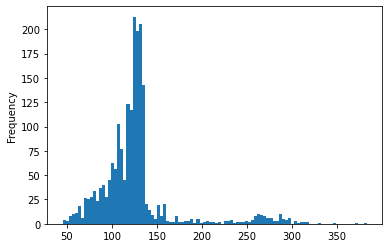

In [14]:
df['length'].plot(bins=100, kind='hist') 

In [15]:
df.length.describe()

count    1953.000000
mean      126.462878
std        44.345049
min        45.000000
25%       106.000000
50%       123.000000
75%       131.000000
max       383.000000
Name: length, dtype: float64

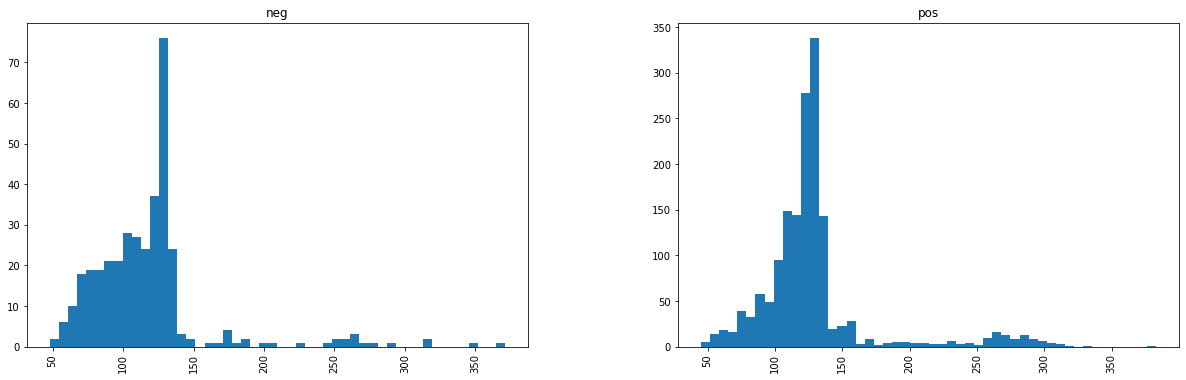

In [16]:
dl=df.hist(column='length', by='comp_score', bins=50,figsize=(20,6))

In [17]:
display(dl)

array([<AxesSubplot:title={'center':'neg'}>,
       <AxesSubplot:title={'center':'pos'}>], dtype=object)